Although the topic of sustainability has been on the rise in recent years, the general discussion of sustainable transportation is much less developed. As sustainable transportation, and shared transportation in particular, is a topic I'm interested in learning about, I've decided to take the time to combine this interest with my newfound python prowess. Tangible data on the effects of sustainable transportation is not prevalent, so hopefully this small project can at least add a blip to the fledgling amount of research.

I wanted to look at how investment in public transportation affects the economy in terms of individual income. To do this, I've focused specifically on Washington D.C. This is a city that has recently, in 1991, installed the Metro Green Line to Anacostia, one poorest (and therefore most transit-dependent) areas of the city. I originally wanted to compare the income levels of Anacostia to the neighborhoods across the Anacostia river, which are known to be more affluent, before and after the Green Line was built. I unfortunately couldn't find data specific to neighborhoods in the city, so I had to settle for data of the city as a whole. This naturally creates much less conclusive results. As an attempt to control for some external factors, I've included income of the U.S. for comparison. 

tl;dr: I looked at income trends in Washington D.C. before and after a major Metro line connecting a poorer neighborhood to the rest of the city was built. Income data of the U.S. was added as a comparison. 

**Data Used:**
From the Federal Reserve Economic Data website:

Real Median Household Income in the District of Columbia
https://fred.stlouisfed.org/series/MEHOINUSDCA672N

Real Median Household Income in the United States
https://fred.stlouisfed.org/series/MEHOINUSA672N

**Import Necessary Packages**

In [63]:
import sys                       # system module 
import pandas as pd              # to create and manipulate DataFrames
import matplotlib as mpl         # graphics package
import matplotlib.pyplot as plt  # pyplot module to plot pretty graphs
import datetime as dt            # date and time module

In [64]:
dc_income_date = pd.read_csv("C:\\Users\\jenni\\Documents\\Project Transportation on Income\\WashingtonDCMedianHouseholdIncome.csv")
us_income_date = pd.read_csv("C:\\Users\\jenni\\Documents\\Project Transportation on Income\\United States Median Household Income.csv")

**Cleaning Data for Relevant Information**

In [65]:
#extracting the year from the current mm/dd/yyyy format
dc_income_date['Date'] = pd.to_datetime(dc_income_date['Date']) #for dc
dc_income_date['Year'] = dc_income_date['Date'].dt.year

us_income_date['Date'] = pd.to_datetime(us_income_date['Date']) #for us
us_income_date['Year'] = us_income_date['Date'].dt.year

# merging datasets
income = pd.merge(dc_income_date, us_income_date, on = "Year")
income["US Income"] = income["United States Median Household Income"]
income["DC Income"] = income["Median Household Income"]

#creating new dataframe with only necessary data
income = income[['Year','US Income', 'DC Income']].copy()

#setting year as index
income.set_index("Year", inplace = True)

income

,US Income,DC Income
Year,,
1984,50511,45988
1985,51455,45917
1986,53309,52077
1987,53945,56831
1988,54390,53423
1989,55329,51206
1990,54621,49967
1991,53025,52601
1992,52615,51947


**Plot the Data**

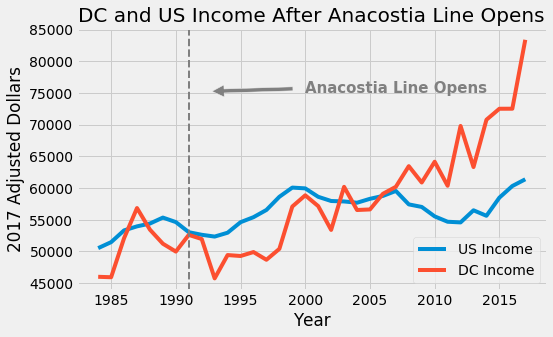

In [95]:
fig, ax = plt.subplots(figsize = (7.5, 4.5))

income.plot(ax = ax)
ax.set_title('DC and US Income After Anacostia Line Opens', fontsize=20)
ax.set_ylabel('2017 Adjusted Dollars')

plt.axvline(x = 1991, color = "gray", linewidth = 2.0, linestyle = "--")

ax.annotate("Anacostia Line Opens", 
             xy=(1992, 75200), 
             xytext=(2000, 75000), 
             fontsize = 15,
             fontweight = "bold", 
             color = "gray", 
             arrowprops = dict(facecolor = "gray", shrink = 0.10))

plt.show()

Although there are far too many external factors that have likely influenced this trend, it is interesting to note that about 15 years after the opening of the line, DC Income started to exceed US Income. The lack of growth immediately after the opening may be due to little development that occurred even after the Anacostia station opened. There were no new plans for retail development until at least 2005. 

To determine whether this is legitimate causal impact or mere coincidence, I would've liked to look directly at income determined by DC neighborhoods. However, to gather more information, I'd also like to look into trends in employment. I could explore jobs created by the building of not just the Green Line, but also the four new lines created in the years following, and see if the growth of the transportation industry in DC had any effect on income.